# Segmentação de Clientes em um Shopping

## 1. Coleta de Dados

**Fonte:** Dataset [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) do Kaggle.  
**Variáveis Utilizadas:**
- `Annual Income (k$)`: Renda anual em milhares de dólares
- `Spending Score (1-100)`: Nível de gastos no shopping (escala 1-100)


In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Coleta de Dados
file_path = "Mall_Customers.csv"

if not os.path.exists(file_path):
    from google.colab import files
    uploaded = files.upload()  # Faz upload manual se rodar no Colab
    file_path = list(uploaded.keys())[0]

data = pd.read_csv(file_path)

Saving Mall_Customers.csv to Mall_Customers.csv


# **2. Pré-processamento**

**Etapas**

* Seleção de features relevantes

* Normalização dos dados

In [32]:
# 2. Pré-processamento
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
print(data.isnull().sum())  # Verifica valores nulos
print(data.describe())  # Analisa estatísticas básicas

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


# **3. Modelagem com K-means**
**Seleção do Número de Clusters** (Método do Cotovelo):

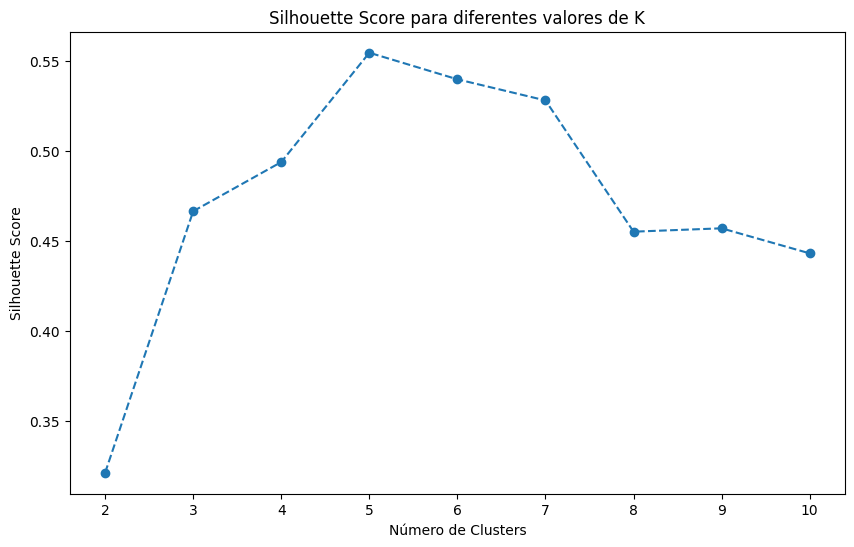

In [34]:

# 3. Seleção do Número de Clusters (Método do Cotovelo e Silhouette Score)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.savefig("clusters_visualization.png")  # Salva a figura
plt.show()

# **4. Treinamento do Modelo**

In [35]:
# 4. Treinamento do Modelo com K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# **5. Visualização dos Resultados**
Gráfico de Dispersão dos Clusters:

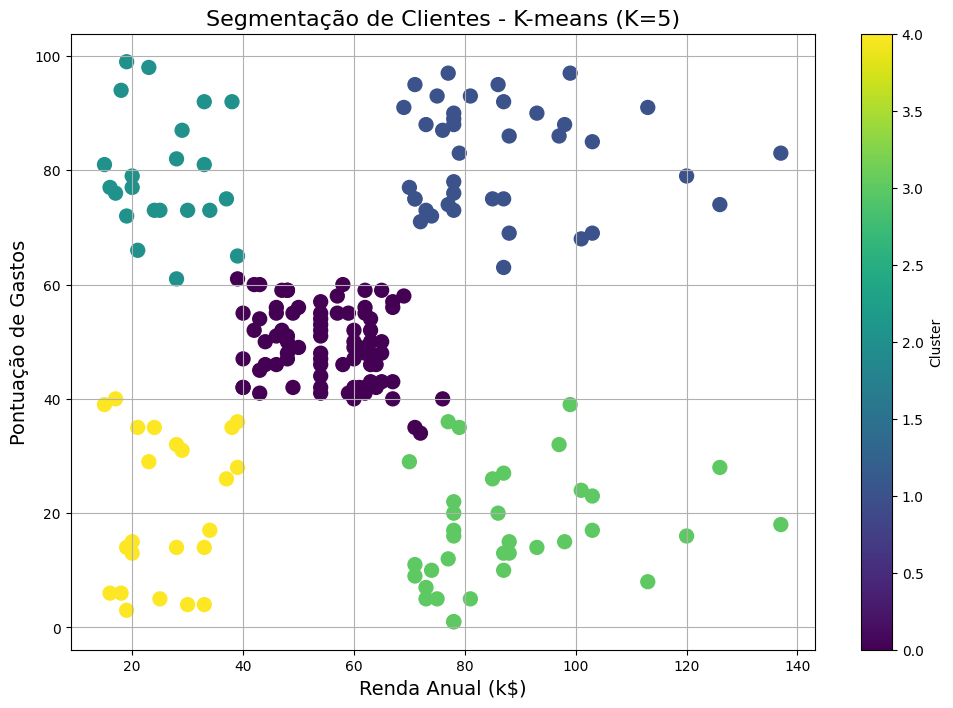

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(data['Annual Income (k$)'],
            data['Spending Score (1-100)'],
            c=data['Cluster'],
            cmap='viridis',
            s=100)

plt.xlabel('Renda Anual (k$)', fontsize=14)
plt.ylabel('Pontuação de Gastos', fontsize=14)
plt.title('Segmentação de Clientes - K-means (K=5)', fontsize=16)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# **6. Avaliação do Modelo**
Silhouette Score:

In [38]:
# 6. Avaliação do Modelo
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.55


# **7. Conclusões**
**Interpretação dos Clusters:**





1.  **Cluster 0 (Verde):** Renda moderada, gastos médios

2.  **Cluster 1 (Amarelo):** Alta renda, baixos gastos

3.  **Cluster 2 (Azul):** Baixa renda, baixos gastos

4.  **Cluster 3 (Roxo):** Baixa renda, altos gastos

5.  **Cluster 4 (Laranja):** Alta renda, altos gastos

**Recomendações:**

* Criar campanhas personalizadas para o Cluster 4 (clientes premium)

* Oferecer promoções específicas para o Cluster 3

* Estudo qualitativo sobre motivações do Cluster 1

In [ ]:
import os
import subprocess
from google.colab import files

# 📥 1. Baixando os arquivos do Colab
print("📥 Faça upload dos arquivos necessários: Customer_Segmentation_Analysis.ipynb, clusters_visualization.png, Mall_Customers.csv")
uploaded = files.upload()  # Abre uma janela para upload

# 📂 2. Configurando o repositório
repo_url = "https://github.com/RonaldoChiavegatti/customer-segmentation.git"
repo_path = "customer-segmentation"

# 🔍 3. Clonando o repositório (se ainda não existir)
if not os.path.exists(repo_path):
    subprocess.run(["git", "clone", repo_url])
os.chdir(repo_path)

# 🚀 4. Movendo os arquivos para dentro do repositório
for filename in uploaded.keys():
    subprocess.run(["mv", f"../{filename}", "."])

# 📝 5. Adicionando, comitando e enviando as mudanças para o GitHub
subprocess.run(["git", "add", "."])
subprocess.run(["git", "commit", "-m", "Atualizando arquivos da análise de segmentação de clientes"])
subprocess.run(["git", "push", "origin", "main"])

print("✅ Arquivos enviados para o GitHub com sucesso!")


📥 Faça upload dos arquivos necessários: Customer_Segmentation_Analysis.ipynb, clusters_visualization.png, Mall_Customers.csv
